Проанализируем вид датасета, полученного из wiki dictionary.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [4]:
file_name = 'dataset_example.csv'

data = pd.read_csv(file_name, delimiter='\\')

FileNotFoundError: [Errno 2] File dataset_example.csv does not exist: 'dataset_example.csv'

In [3]:
# Start configuration
print(data.shape)
# data.describe()
data.head()

(785566, 5)


,Заглавная страница,Unnamed: 1,[],"{'synonyms': [], 'hyponyms': [], 'hypernyms': [], 'antonyms': []}",[].1
0,Фемиксира,noun,[('согласно легендам греческой мифологии — гор...,"{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",['']
1,эбонитовый,other,"[('произведённый из эбонита', ['Для этого опыт...","{'synonyms': ['-', 'чёрный'], 'hyponyms': ['',...",['']
2,а,noun,[('название первой буквы русского алфавита или...,"{'synonyms': ['и : аз'], 'hyponyms': ['—', '']...","['от а до я (от а до зет)', 'сказал а, говори ..."
3,Ба,noun,"[('демон засухи в древнекитайской мифологии', ...","{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",['']
4,в,other,"[('внутрь чего-либо (предмета или места)', ['П...","{'synonyms': ['внутрь', 'част. на', 'через', '...",['типовые сочетания с предлогом в']


In [4]:
df = data.copy()

# renaming columns
df.rename(columns={
    df.columns[0]: 'word',
    df.columns[1]: 'POS',
    df.columns[2]: 'defs_str',
    df.columns[3]: 'rels_str',
    df.columns[4]: 'phras_str'
}, inplace = True)

Модифицируем вид данных.  
Заменим идектификатор существительного на bool.  
Определения, фразеологизмы, иные текстовые данные прочитаем в соответствии с их структурой (как списки, словари).

In [5]:
is_noun = df['POS'].map(lambda x: x == 'noun')
defs = df['defs_str'].map(lambda x: eval(x))
rels = df['rels_str'].map(lambda x: eval(x))
phras = df['phras_str'].map(lambda x: eval(x))

df = df.drop(['POS', 'defs_str', 'rels_str', 'phras_str'], axis=1)

In [6]:
df_lists = pd.DataFrame({'is_noun': is_noun, 'defs': defs, 'rels': rels, 'phras': phras})
df = pd.concat([df, df_lists], axis = 1)
df.head()

,word,is_noun,defs,rels,phras
0,Фемиксира,True,[(согласно легендам греческой мифологии — горо...,"{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",[]
1,эбонитовый,False,"[(произведённый из эбонита, [Для этого опыта н...","{'synonyms': ['-', 'чёрный'], 'hyponyms': ['',...",[]
2,а,True,[(название первой буквы русского алфавита или ...,"{'synonyms': ['и : аз'], 'hyponyms': ['—', '']...","[от а до я (от а до зет), сказал а, говори и бэ]"
3,Ба,True,"[(демон засухи в древнекитайской мифологии, [О...","{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",[]
4,в,False,"[(внутрь чего-либо (предмета или места), [Пойт...","{'synonyms': ['внутрь', 'част. на', 'через', '...",[типовые сочетания с предлогом в]


Можно удалить слова, начинающиеся с заглавной буквы, как нецелевые. Однако, текстовые данные при них могут быть полезны при построении языковой модели.

In [7]:
# delete names
# df = df[df['word'].map(lambda x: not str(x).istitle())]

Удалим все слова, содержащие символы кроме кириллицы и дефиса (например, в данных часто встречаются украинские слова с буквой i).

In [8]:
import re

word_pattern = re.compile('^[А-Яа-я-]+$')
df = df[df['word'].map(lambda x: bool(re.match(word_pattern, str(x))))]

In [9]:
# df = df[df['defs'].map(lambda x: str(x) != '[]')]
# df = df[df['defs'].map(lambda x: str(x) != "[('', ['']), ('', [])]")]
print(df.shape)
df

(681348, 5)


,word,is_noun,defs,rels,phras
0,Фемиксира,True,[(согласно легендам греческой мифологии — горо...,"{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",[]
1,эбонитовый,False,"[(произведённый из эбонита, [Для этого опыта н...","{'synonyms': ['-', 'чёрный'], 'hyponyms': ['',...",[]
2,а,True,[(название первой буквы русского алфавита или ...,"{'synonyms': ['и : аз'], 'hyponyms': ['—', '']...","[от а до я (от а до зет), сказал а, говори и бэ]"
3,Ба,True,"[(демон засухи в древнекитайской мифологии, [О...","{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",[]
4,в,False,"[(внутрь чего-либо (предмета или места), [Пойт...","{'synonyms': ['внутрь', 'част. на', 'через', '...",[типовые сочетания с предлогом в]
...,...,...,...,...,...
785558,посттарантиновский,False,[(имеющий место после выхода первых фильмов Кв...,"{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",[]
785559,Фартанга,True,"[(река на Северном Кавказе, правый приток Ассы...","{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",[]
785561,гаплагрупа,True,"[([[гаплогруппа, []), (Русский|гаплогруппа]], ...","{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",[]
785563,хаплогрупа,True,"[([[гаплогруппа, []), (Русский|гаплогруппа]], ...","{'synonyms': ['', ''], 'hyponyms': ['', ''], '...",[]


Добавим столбец с числом определений слова.  
Из общего ряда выбиваются два значения - 105 и 80.

In [10]:
n_defs = df['defs'].map(lambda x: len(x))
df.insert(len(df.columns), 'n_defs', n_defs)
df['n_defs'].value_counts()

2      427977
0      179176
3       34157
1       19097
4       11866
5        6046
6        1279
7         696
8         397
9         231
10        130
11         95
12         70
13         31
14         22
15         21
17         16
16         14
18          6
19          5
21          3
22          3
20          2
80          1
25          1
26          1
28          1
30          1
32          1
37          1
105         1
Name: n_defs, dtype: int64

In [11]:
defs_105 = df.loc[df['n_defs'] == 105]
defs_105

,word,is_noun,defs,rels,phras,n_defs
233675,СК,True,"[(, []), (, (в названии серии электровозов), [...","{'synonyms': ['', '', ''], 'hyponyms': [], 'hy...",[],105


In [12]:
defs_80 = df.loc[df['n_defs'] == 80]
defs_80

,word,is_noun,defs,rels,phras,n_defs
272070,ВК,True,"[(, []), (, []), (, []), (, []), (, []), (, []...","{'synonyms': ['', '', ''], 'hyponyms': [], 'hy...",[],80


Удалим девиантные строки и построим гистограмму числа определений слов.

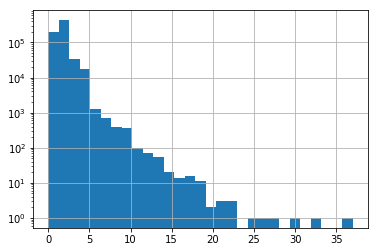

In [16]:
df = df.loc[df['n_defs'] != 105]
df = df.loc[df['n_defs'] != 80]
df['n_defs'].hist(bins=len(df['n_defs'].value_counts()))
plt.gca().set_yscale("log")

Посмотрим на длину определений.

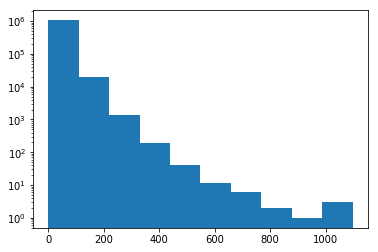

In [14]:
def_len = []
for i in df['defs']:
    for j in i:
        def_len.append(len(j[0]))
        
plt.hist(def_len)
plt.gca().set_yscale("log")
# def_len.value_counts()
# print(np.mean(def_len))

Mean word lenght value:  10.155432041870062
Frequency of unique values of the word_len array:
[[    1     2     3     4     5     6     7     8     9    10    11    12
     13    14    15    16    17    18    19    20    21    22    23    24
     25    26    27    28    29    30    31    32    33    34    36    37
     38    40    42    46    51    82]
 [   46   630  4808 13570 28026 40081 57661 74791 83126 85693 77186 65027
  49309 35656 24311 15936 10034  6262  3802  2147  1288   668   416   294
    193   128    93    57    26    35    18    14     1     2     1     2
      1     2     1     2     1     1]]


(array([6.76000e+02, 1.83780e+04, 6.81070e+04, 1.32452e+05, 1.68819e+05,
        1.42213e+05, 8.49650e+04, 4.02470e+04, 1.62960e+04, 5.94900e+03,
        1.95600e+03, 7.10000e+02, 3.21000e+02, 9.30000e+01, 8.30000e+01,
        5.30000e+01, 1.50000e+01, 2.00000e+00, 3.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([ 1.        ,  2.92857143,  4.85714286,  6.78571429,  8.71428571,
        10.64285714, 12.57142857, 14.5       , 16.42857143, 18.35714286,
        20.28571429, 22.21428571, 24.14285714, 26.07142857, 28.        ,
        29.92857143, 31.85714286, 33.78571429, 35.71428571, 37.64285714,
        39.57142857, 41.5       , 43.42857143, 45.35714286, 47.28571429,
        49.2142

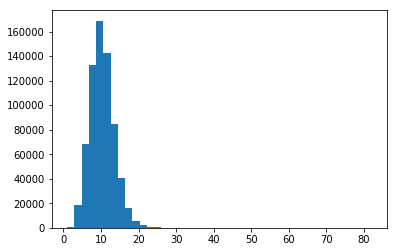

In [24]:
word_len = df['word'].map(lambda x: len(x))
print('Mean word lenght value: ', np.mean(word_len))

unique_elements, counts_elements = np.unique(word_len, return_counts=True)
print("Frequency of unique values of the word_len array:")
print(np.asarray((unique_elements, counts_elements)))

plt.hist(word_len, bins=len(unique_elements))

В целом, требуется очистить данные от шума - пустых определений, возможно, имен собственных, предлогов.